Data: https://github.com/pcsanwald/kaggle-titanic/blob/master/test.csv and train

In [4]:
#importing of required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipy_table as tbl
from numbers import Number
from scipy import stats
#allow plots and visualisations to be displayed in the report
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
!pip install ipy_table

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for ipy_table: filename=ipy_table-1.15.1-py3-none-any.whl size=18756 sha256=cdabbc3799de353b614c3e8c841423fe0e93ff48a45f8d131fd5a110349a8ee2
  Stored in directory: c:\users\pranjal singh\appdata\local\pip\cache\wheels\e9\69\72\d8930ca5f272d756327811af4721b0bed1d8fa374ddf88b712
Successfully built ipy_table


**Data Wrangling / Cleaning**
Before working with the data I needed to look at what needed to be cleaned up, i.e. find missing data, remove data that will not assist with the analysis.

In [75]:
# Read csv into Pandas Dataframe and store in dataset variable
titanic_df = pd.read_csv('/content/drive/MyDrive/Data_Analysis_and_Visualization_B_Tech_2023_2024/Real_world_data/train_titanic.csv')

In [76]:
# print out information about the data
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


Age, Cabin and Embarked columns are missing entries. As the Cabin column is not relevant to the analysis of the data I will be removing that column however I will need to find a way update populate the missing ages and embarked port.

In [77]:
titanic_df.head(3)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [78]:
titanic_df['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

**Missing Ages**
In order to populate the missing ages I will use the mean age based on the Sex and Pclass

In [79]:
missing_ages = titanic_df[titanic_df['age'].isnull()]
missing_ages

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [80]:
# determine mean age based on Sex and Pclass
mean_ages = titanic_df.groupby(['sex','pclass'])['age'].mean()
mean_ages

sex     pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: age, dtype: float64

In [81]:
def remove_na_ages(row):

    if pd.isnull(row['age']):
        return mean_ages[row['sex'],row['pclass']]
    else:
        return row['age']

titanic_df['age'] =titanic_df.apply(remove_na_ages, axis=1)

In [82]:
# print out information about the data
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       891 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [83]:
titanic_df['age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: age, Length: 891, dtype: bool

**Missing embarkation ports**:
In order to populate the missing embarked ports I need to first determine if the people with the missing information may have been travelling with others.

In [84]:
missing_ports = titanic_df[titanic_df['embarked'].isnull()]
missing_ports

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [85]:
# search by ticket number and cabin
titanic_df[(titanic_df['embarked'].notnull()) & ((titanic_df['ticket'] == '113572') | (titanic_df['cabin'] == 'B28'))]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked


In [86]:
#Howmany unique port and howmany boarded from there
titanic_df['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

Since searching for similar records did not return any results and it appears that both were travelling in the same cabin and with the same ticket number and the bulk of passengers were travelling from Southhampton, I have choosen to use Southhampton as the missing value.

In [87]:
titanic_df['embarked'].fillna('S',inplace=True)

In [88]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       891 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


**Remove un-wanted columns**
Since the Cabin, Name and Ticket numbers are not required in this analysis I will remove them to improve the speed of processing the dataframe.

In [89]:
# dropping columns Cabin, Name and Ticket
titanic_df = titanic_df.drop(['cabin','name','ticket'], axis=1)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


**Mapping data (values to descriptions):**

In order to intrepret the data easier the following fields need to be modified:

These are categorical columns

Survived - changed to boolean (1 = True, 0 = False)
Pclass - changed to Socio-Economic status (1st - Upper Class, 2nd - Middle Class, 3rd - Lower Class)
Embarked - changed to name of embarkation port (C = Cherbourg; Q = Queenstown; S = Southampton)


In [90]:
# df['survived'] = df['survived'].map({0: False, 1: True})

In [91]:
def map_data(df):
    survived_map = {0: False, 1: True}
    df['survived'] = df['survived'].map(survived_map)
    pclass_map = {1: 'Upper Class', 2: 'Middle Class', 3: 'Lower Class'}
    df['pclass'] = df['pclass'].map(pclass_map)
    port_map = {'S': 'Southampton', 'C': 'Cherbourg','Q':'Queenstown'}
    df['embarked'] = df['embarked'].map(port_map)
    df['familySize'] = df['sibsp'] + df['parch']
    return df
titanic_df = map_data(titanic_df)
titanic_df.head(3)
#Execute this cell only once
#Execute this cell only once
#Execute this cell only once

,survived,pclass,sex,age,sibsp,parch,fare,embarked,familySize
0,False,Lower Class,male,22.0,1,0,7.2500,Southampton,1
1,True,Upper Class,female,38.0,1,0,71.2833,Cherbourg,1
2,True,Lower Class,female,26.0,0,0,7.9250,Southampton,0


Grouping / Binning Ages

In [92]:
titanic_df['age'].max()

80.0

In [93]:
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
titanic_df['age_group'] = pd.cut(titanic_df.age, range(0, 81, 10), right=False, labels=age_labels)
# it creates intervals like [0, 10), [10, 20), [20, 30), and so on.

In [94]:
titanic_df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,familySize,age_group
0,False,Lower Class,male,22.0,1,0,7.2500,Southampton,1,20-29
1,True,Upper Class,female,38.0,1,0,71.2833,Cherbourg,1,30-39
2,True,Lower Class,female,26.0,0,0,7.9250,Southampton,0,20-29


In [95]:
titanic_df['age'].notnull().count()

891

#**Analysis of data**

Based on the information provided by the source of the dataset there were 2224 passengers and 722 survivors.

In [96]:
#as per source
S_passengers = 2224
S_nonsurvivors = 1502
S_survivors = S_passengers - S_nonsurvivors


In [97]:
# Count number of passengers and number of survivors in sample data
sample_passengers = len(titanic_df)
sample_survivors = len(titanic_df[titanic_df.survived==True])
sample_nonsurvivors = sample_passengers - sample_survivors

In [98]:
survivors_data = titanic_df[titanic_df.survived==True]
non_survivors_data = titanic_df[titanic_df.survived==False]

**Method 1 using functions**

In [99]:
def as_percent(val, precision='0.2'):

    if isinstance(val, Number):
        return "{{:{}%}}".format(precision).format(val)
    else:
        raise TypeError("Numeric type required")

def calculate_percentage(val, total, format_percent = False):

    percent = np.divide(val, total, dtype=float)
    if format_percent:
        percent = as_percent(percent)
    return percent

In [100]:
#as per source
S_passengers = 2224
S_nonsurvivors = 1502
S_survivors = S_passengers - S_nonsurvivors
# Count number of passengers and number of survivors in sample data
sample_passengers = len(titanic_df)
sample_survivors = len(titanic_df[titanic_df.survived==True])
sample_nonsurvivors = sample_passengers - sample_survivors

In [101]:
survivors = [
    ['Item','From Source (Count)','From Source (%)' ,'Sample Dataset (Count)', 'Sample Dataset (%)'],
    ['Total Passengers',S_passengers,'-', sample_passengers,'-'],
    ['Survivors',
         S_survivors,
         calculate_percentage(S_survivors,S_passengers, True),  #variable name, s_per
         sample_survivors,
         calculate_percentage(sample_survivors,sample_passengers, True)
    ],
    ['Non-survivors',
         S_nonsurvivors,
         calculate_percentage(S_nonsurvivors,S_passengers, True),
         sample_nonsurvivors,
         calculate_percentage(sample_nonsurvivors,sample_passengers, True)
    ]
]
tbl.make_table(survivors)

Item,From Source (Count),From Source (%),Sample Dataset (Count),Sample Dataset (%)
Total Passengers,2224,-,891,-
Survivors,722,32.46%,342,38.38%
Non-survivors,1502,67.54%,549,61.62%


**Method 2 without using functions**

In [102]:
#as per source
S_passengers = 2224
S_nonsurvivors = 1502
S_survivors = S_passengers - S_nonsurvivors
# Count number of passengers and number of survivors in sample data
sample_passengers = len(titanic_df)
sample_survivors = len(titanic_df[titanic_df.survived==True])
sample_nonsurvivors = sample_passengers - sample_survivors

In [103]:
sur_per_report=S_survivors/S_passengers*100
non_sur_per_report=S_nonsurvivors/S_passengers*100
sur_per_sample=sample_survivors/sample_passengers*100
non_sur_per_sample=sample_nonsurvivors/sample_passengers*100

In [104]:
survivors = [
    ['Item','From Source (Count)','From Source (%)' ,'Sample Dataset (Count)', 'Sample Dataset (%)'],
    ['Total Passengers',S_passengers,'-', sample_passengers,'-'],
    ['Survivors',
         S_survivors,
         sur_per_report,   #calculate_percentage(S_survivors,S_passengers, True),
         sample_survivors,
         sur_per_sample
    ],
    ['Non-survivors',
         S_nonsurvivors,
        non_sur_per_report,
         sample_nonsurvivors,
         non_sur_per_sample
    ]
]
tbl.make_table(survivors)

Item,From Source (Count),From Source (%),Sample Dataset (Count),Sample Dataset (%)
Total Passengers,2224,-,891,-
Survivors,722,32.4640,342,38.3838
Non-survivors,1502,67.5360,549,61.6162


 Which gender had a better chance of survival

pd.crosstab() is a function provided by the pandas library in Python, used for computing a cross-tabulation of two or more factors. It's essentially a frequency table that shows the distribution of one variable in rows and another in columns.

In [105]:
print(pd.crosstab(titanic_df['survived'],titanic_df['pclass']))

pclass    Lower Class  Middle Class  Upper Class
survived                                        
False             372            97           80
True              119            87          136


In [106]:
table = pd.crosstab(titanic_df['survived'],titanic_df['sex'])
print(table)

sex       female  male
survived              
False         81   468
True         233   109


Text(0.5, 1.0, 'Survived')

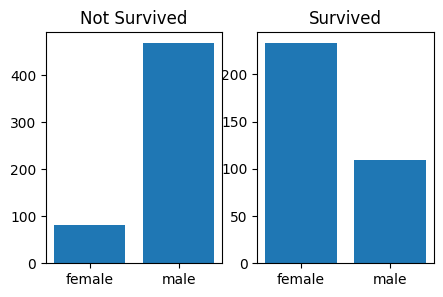

In [107]:
fig,(ax1, ax2) =plt.subplots(1, 2, figsize=(5,3))
ax1.bar(['female','male'], table.iloc[0])
ax1.set_title('Not Survived')
ax2.bar(['female','male'], table.iloc[1])
ax2.set_title('Survived')

In [ ]:
# type(table)
# table.columns
# table.iloc[0]

In [ ]:
# table.loc[False]

Proportion of survivors by Gender

In [110]:
print(titanic_df.groupby('sex').survived.mean())

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64


Text(0.5, 1.0, '% of survivors by gender')

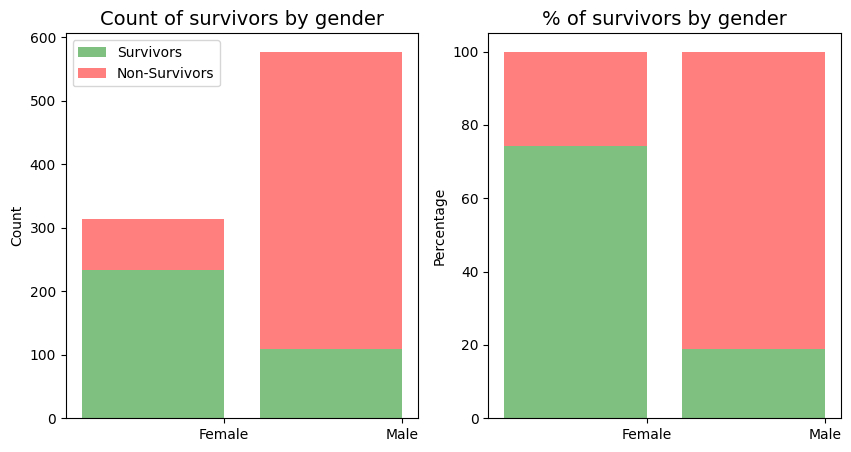

In [111]:
# calculate values for each survival status
survivors_gender = survivors_data.groupby(['sex']).size().values
non_survivors_gender = non_survivors_data.groupby(['sex']).size().values

# calculate totals for percentates
totals = survivors_gender + non_survivors_gender

# use calculate_percentage_function to calculate percentage of the total
data1_percentages = calculate_percentage(survivors_gender, totals)*100
data2_percentages = calculate_percentage(non_survivors_gender, totals)*100

gender_categories = ['Female', 'Male']

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
# plot chart for count of survivors by class
ax1.bar(range(len(survivors_gender)), survivors_gender, label='Survivors', alpha=0.5, color='g')
ax1.bar(range(len(non_survivors_gender)), non_survivors_gender, bottom=survivors_gender, label='Non-Survivors', alpha=0.5, color='r')
plt.sca(ax1)
plt.xticks([0.4, 1.4], gender_categories )
ax1.set_ylabel("Count")
ax1.set_xlabel("")
ax1.set_title("Count of survivors by gender",fontsize=14)
plt.legend(loc='upper left')

# plot chart for percentage of survivors by class
ax2.bar(range(len(data1_percentages)), data1_percentages, alpha=0.5, color='g')
ax2.bar(range(len(data2_percentages)), data2_percentages, bottom=data1_percentages, alpha=0.5, color='r')
plt.sca(ax2)
plt.xticks([0.4, 1.4],  gender_categories)
ax2.set_ylabel("Percentage")
ax2.set_xlabel("")
ax2.set_title("% of survivors by gender",fontsize=14)

Which social class had a better chance of survival?

In [112]:
table = pd.crosstab(titanic_df['survived'],titanic_df['pclass'])
table

pclass,Lower Class,Middle Class,Upper Class
survived,,,
False,372,97,80
True,119,87,136


In [113]:
titanic_df.groupby('pclass').survived.mean()

pclass
Lower Class     0.242363
Middle Class    0.472826
Upper Class     0.629630
Name: survived, dtype: float64

Text(0.5, 1.0, '% of survivors by class')

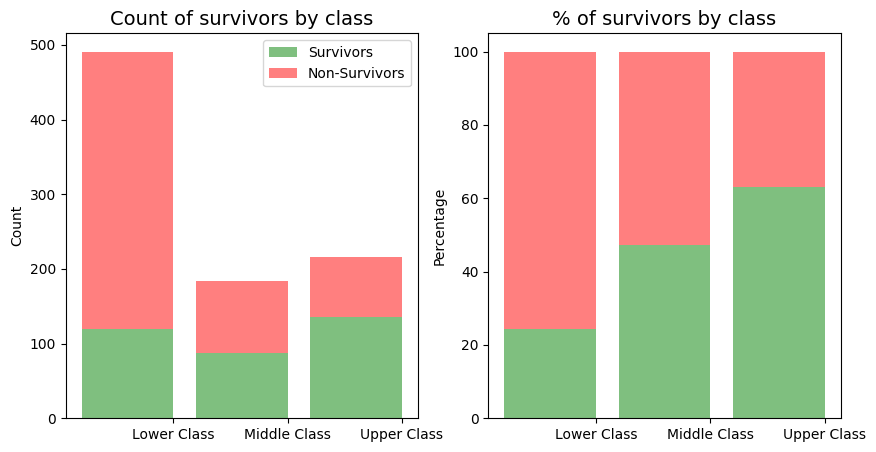

In [114]:
# calculate values for each survival status
survivors_class = survivors_data.groupby(['pclass']).size().values
non_survivors_class = non_survivors_data.groupby(['pclass']).size().values

# calculate totals for percentates
totals = survivors_class + non_survivors_class

# use calculate_percentage_function to calculate percentage of the total
data1_percentages = calculate_percentage(survivors_class, totals)*100
data2_percentages = calculate_percentage(non_survivors_class, totals)*100


class_categories = ['Lower Class', 'Middle Class', 'Upper Class']


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
# plot chart for count of survivors by class
ax1.bar(range(len(survivors_class)), survivors_class, label='Survivors', alpha=0.5, color='g')
ax1.bar(range(len(non_survivors_class)), non_survivors_class, bottom=survivors_class, label='Non-Survivors', alpha=0.5, color='r')
plt.sca(ax1)
plt.xticks([0.4, 1.4, 2.4], class_categories )
ax1.set_ylabel("Count")
ax1.set_xlabel("")
ax1.set_title("Count of survivors by class",fontsize=14)
plt.legend(loc='upper right')

# plot chart for percentage of survivors by class
ax2.bar(range(len(data1_percentages)), data1_percentages, alpha=0.5, color='g')
ax2.bar(range(len(data2_percentages)), data2_percentages, bottom=data1_percentages, alpha=0.5, color='r')
plt.sca(ax2)
plt.xticks([0.4, 1.4, 2.4],  class_categories)
ax2.set_ylabel("Percentage")
ax2.set_xlabel("")
ax2.set_title("% of survivors by class",fontsize=14)

Which age group had a better chance of survival?

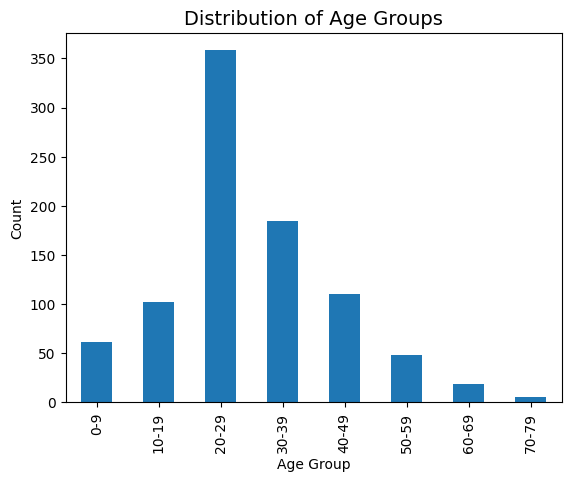

In [115]:
titanic_df.groupby(['age_group']).size().plot(kind='bar',stacked=True)
plt.title("Distribution of Age Groups",fontsize=14)
plt.ylabel('Count')
plt.xlabel('Age Group');

In [116]:
titanic_df.groupby(['age_group']).survived.mean()

age_group
0-9      0.612903
10-19    0.401961
20-29    0.315642
30-39    0.454054
40-49    0.354545
50-59    0.416667
60-69    0.315789
70-79    0.000000
Name: survived, dtype: float64

Text(0.5, 1.0, '% of survivors by age group')

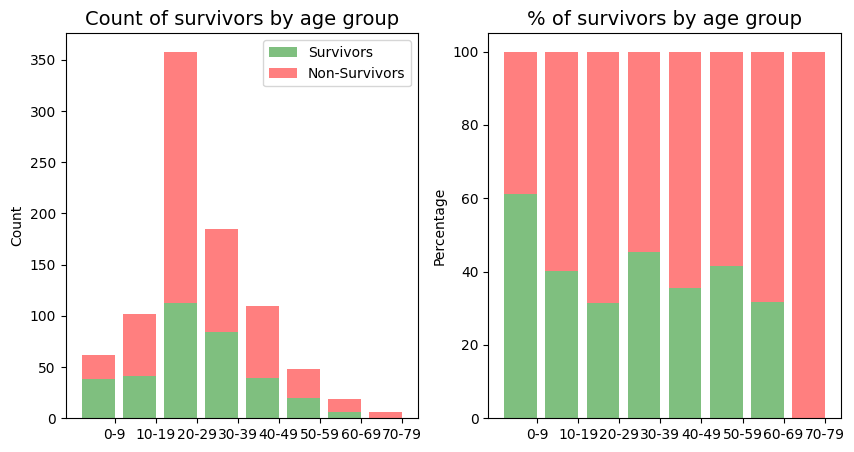

In [117]:
# calculate values for each survival status
survivors_age_group = survivors_data.groupby(['age_group']).size().values
non_survivors_age_group = non_survivors_data.groupby(['age_group']).size().values

# calculate totals for percentates
totals = survivors_age_group + non_survivors_age_group

# use calculate_percentage_function to calculate percentage of the total
data1_percentages = calculate_percentage(survivors_age_group, totals)*100
data2_percentages = calculate_percentage(non_survivors_age_group, totals)*100


tick_spacing = np.array(range(len(age_labels)))+0.4


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
# plot chart for count of survivors by class
ax1.bar(range(len(survivors_age_group)), survivors_age_group, label='Survivors', alpha=0.5, color='g')
ax1.bar(range(len(non_survivors_age_group)), non_survivors_age_group, bottom=survivors_age_group, label='Non-Survivors', alpha=0.5, color='r')
plt.sca(ax1)
plt.xticks(tick_spacing, age_labels )
ax1.set_ylabel("Count")
ax1.set_xlabel("")
ax1.set_title("Count of survivors by age group",fontsize=14)
plt.legend(loc='upper right')

# plot chart for percentage of survivors by class
ax2.bar(range(len(data1_percentages)), data1_percentages, alpha=0.5, color='g')
ax2.bar(range(len(data2_percentages)), data2_percentages, bottom=data1_percentages, alpha=0.5, color='r')
plt.sca(ax2)
plt.xticks(tick_spacing,  age_labels)
ax2.set_ylabel("Percentage")
ax2.set_xlabel("")
ax2.set_title("% of survivors by age group",fontsize=14)

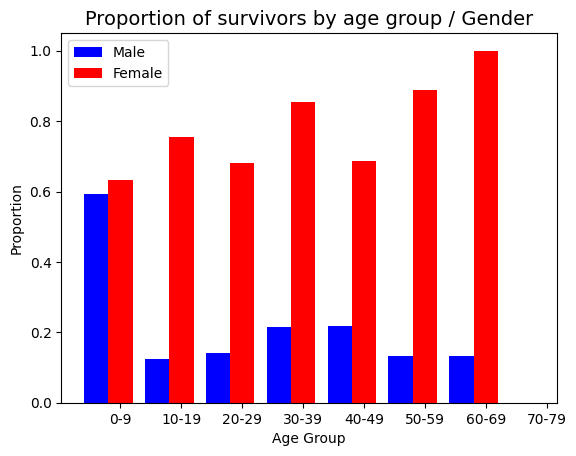

In [118]:
male_data = titanic_df[titanic_df.sex == "male"].groupby('age_group').survived.mean().values
female_data = titanic_df[titanic_df.sex == "female"].groupby('age_group').survived.mean().values
ax = plt.subplot()
male_plt_position = np.array(range(len(age_labels)))
female_plt_position = np.array(range(len(age_labels)))+0.4
ax.bar(male_plt_position, male_data,width=0.4,label='Male',color='b')
ax.bar(female_plt_position, female_data,width=0.4,label='Female',color='r')
plt.xticks(tick_spacing,  age_labels)
ax.set_ylabel("Proportion")
ax.set_xlabel("Age Group")
ax.set_title("Proportion of survivors by age group / Gender",fontsize=14)
plt.legend(loc='best')
plt.show()

**Rough Works**

In [ ]:
train = pd.read_csv("titanic_datasets/train.csv")
test = pd.read_csv("titanic_datasets/test.csv")

# Contatenate dataset
df = pd.concat([train, test], ignore_index = True, sort = False)
df.head()

Checking Missing

In [ ]:
nan_counts = df.isna().sum().sort_values(ascending = False)
summary = pd.concat([df.info(), nan_counts], axis=0)
print(summary)

Encode categorical variables

In [ ]:
# Mapping Sex bolean
df['Is_male'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

In [ ]:
# Check the entries with NaN vales.
df.loc[df['Embarked'].isna(),:]

In [ ]:
# Fill the NaN and map Embarked to numerical codes
df.loc[df['Embarked'].isna(), 'Embarked'] = 'S'  # (Encyclopedia titanica)
df['Embarked_code'] = df['Embarked'].map( {'C': 1, 'Q': 2, 'S': 3} ).astype(int)

Split the “Ticket” into the variables “Ticket_prefix” and “Ticket_number”



In [ ]:
# split the column 'Ticket'
Ticket_split = []
Ticket_len = []
for i in df['Ticket'].index:
    splitted = df.loc[i,'Ticket'].split(' ')
    Ticket_split.append(splitted)
    length = len(splitted)
    Ticket_len.append(length)

df['Ticket_split'] = Ticket_split
df['Ticket_len'] = Ticket_len

# df[['Ticket_len']].value_counts()
# df.loc[df['Ticket_len'] > 2, :] We can see tome typo errors.

# Create columns Ticket_preffix and Ticket_number
ticket_preffix = []
ticket_number = []
for i in df['Ticket'].index:
    ticket_parts = df.loc[i, 'Ticket_split']
    number = ticket_parts[-1]
    ticket_number.append(number)
    length = df.loc[i, 'Ticket_len'].item()
    if length > 1:
        preffix = ''.join(ticket_parts[0:-1])
        ticket_preffix.append(preffix)
    else:
        ticket_preffix.append('blanck')

df['Ticket_preffix'] = ticket_preffix
df['Ticket_number'] = ticket_number
# drop unnecessary columns created
df.drop(columns=['Ticket_split', 'Ticket_len'], inplace=True)

df.Ticket_preffix.unique()

https://medium.com/@praoiticica/titanic-data-cleaning-and-feature-engineering-9f122752097f